In [1]:
import time
from random import seed
from random import randint
import matplotlib.pyplot as plot
import numpy as np

1. The function that produces a random bit pattern of a specific size 

In [2]:
def bitsRandom(bits):
    result = []
    for _ in range(bits):
        result.append(randint(0, 1))
    return result

2.  Create a function that will generate random patterns and measure how many attempts (and how much time) does it take to generate the "correct" bit pattern.

In [3]:
# return list where [0] - attempts, [1] - time
def findBitPattern(bitPattern):
    counter = 0
    bitLength = len(bitPattern)
    
    startTime = time.time() 
    while True:
        randomPattern = bitsRandom(bitLength)
        counter += 1
        if (randomPattern == bitPattern or counter > 10000000):
            break
    runTime = (time.time() - startTime)
    return [counter, runTime]

 # initialise result list of lists
def initResultList(length):
    resultList = []
    for i in range(length) :
        resultList.append([])
    return resultList

In [4]:
seed(1)
runs = 30
bitsNumberList = [8, 10, 12, 14, 16]

# data model: [
#         6bit    [run1,run2,...,run30],
#         8bit    [run1,run2,...,run30],
#         .....      
#             ]

attempts = initResultList(len(bitsNumberList))
runtime = initResultList(len(bitsNumberList))

# 
def task2():
    for _ in range(runs):
        for index, bitsNumber in enumerate(bitsNumberList) :
            originPattern = bitsRandom(bitsNumber)
            result = findBitPattern(originPattern)
            attempts[index].append(result[0])
            runtime[index].append(result[1])

task2()

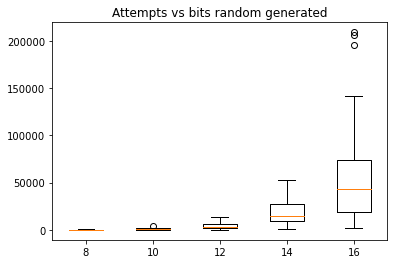

In [5]:
plot.boxplot((attempts),labels = bitsNumberList)
plot.title("Attempts vs bits random generated")
plot.show()

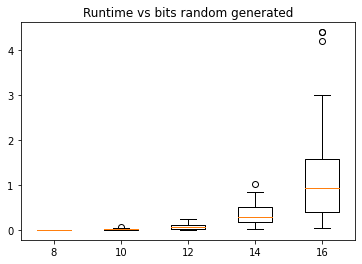

In [6]:
plot.boxplot((runtime),labels = bitsNumberList)
plot.title("Runtime vs bits random generated")
plot.show()

As we can see, attempts and time for a random selection of a bit pattern increase exponentially with increasing bit depth.

3. Create an evaluation function that measures the proximity to a pattern. Can this information be used
to improve the search-times?

In [7]:
# return inverted Hamming distance normalised by bitpattern length
# return float from min=0 to max=1
def getProximity(pattern1, pattern2):
    if (len(pattern1) != len(pattern1)):
        print('Patterns length missmatch!')
        return False
    matchedBits = 0
    for index, bit in enumerate(pattern1):
        if (bit == pattern2[index]):
            matchedBits += 1
    return (matchedBits/len(pattern1))

In [8]:
# return new list with random bit changed to opposit
def mutateBits(bitPattern, bits = 1):
    bitLength = len(bitPattern)
    newPattern = list(bitPattern)
    for bit in range(bits):
        #print(bitPattern)
        bitNumber = randint(0,bitLength - 1)
        #print(bitNumber)
        newPattern[bitNumber] = 0 if bool(newPattern[bitNumber]) else 1
        #print(newPattern)
    return newPattern

In [9]:
# return list where [0] - attempts, [1] - time
def findBitPatternImproved(bitPattern):
    counter = 0
    bitLength = len(bitPattern)
    oldPattern = bitsRandom(bitLength)
    # just in case we guess at once
    if oldPattern == bitPattern : return [0, 0]
    startTime = time.time() 
    while True:
        # mutate bits
        newPattern = mutateBits(oldPattern)
        if (getProximity(bitPattern, newPattern) > getProximity(bitPattern, oldPattern)):
            oldPattern = list(newPattern)
        counter += 1
        if (newPattern == bitPattern or counter > 10000000):
            break
    runTime = (time.time() - startTime)
    return [counter, runTime]

To improve the search time using the proximity function, we will implement the algorithm that will sequentially change randomly 1 bit in the pattern and accept this change only if it gets us closer to target. 

In [10]:
seed(1)
runs = 30
bitsNumberList = [8, 10, 12, 14, 16]

# data model: [
#         8bit    [run1,run2,...,run30],
#         10bit    [run1,run2,...,run30],
#         .....      
#             ]

attempts = initResultList(len(bitsNumberList))
runtime = initResultList(len(bitsNumberList))

# 
def task3():
    for _ in range(runs):
        for index, bitsNumber in enumerate(bitsNumberList) :
            originPattern = bitsRandom(bitsNumber)
            result = findBitPatternImproved(originPattern)
            attempts[index].append(result[0])
            runtime[index].append(result[1])

task3()

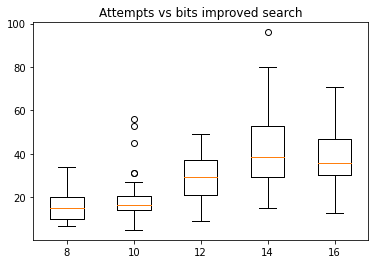

In [11]:
plot.boxplot((attempts),labels = bitsNumberList)
plot.title("Attempts vs bits improved search")
plot.show()

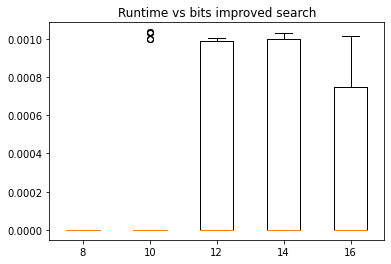

In [12]:
plot.boxplot((runtime),labels = bitsNumberList)
plot.title("Runtime vs bits improved search")
plot.show()

Using such approach we can drastically reduce attempts and time needed to find "right" pattern

4. Create another evaluation function that favors some patterns over others according to rule.

The function will give preference to patterns where "0" and "1" successively alternate. Thus, patterns 10101010 or 01010101 will have the highest score.

In [13]:
# Evaluation function 4
# the best bit patterns is [1,0,1,0,...] or[0,1,0,1,...]
def evaluatePattern4(bitPattern):
    value = 0
    bitLendth = len(bitPattern)
    for index in range(bitLendth - 1):
        if bitPattern[index] != bitPattern[index + 1] :
            value += 1
    return (value / (bitLendth - 1))

In [14]:
def bitsZeros(bits):
    result = []
    for _ in range(bits):
        result.append(0)
    return result
    

# return list where [0] - attempts, [1] - time
def findBitPatternImproved4(bitLength):
    counter = 0
    oldPattern = bitsRandom(bitLength)
    # just in case we guess at once
    if evaluatePattern4(oldPattern) > 0.999 : return [0, 0]
    startTime = time.time() 
    while True:
        # mutate 1 bit
        newPattern = mutateBits(oldPattern)
        if (evaluatePattern4(newPattern) > evaluatePattern4(oldPattern)):
            oldPattern = list(newPattern)
        counter += 1
        if (evaluatePattern4(oldPattern) > 0.999 or counter > 10000):
            break
    runTime = (time.time() - startTime)
    return [counter, runTime, oldPattern]

In [15]:
seed(1)
runs = 30
bitsNumberList = [8, 10, 12, 14, 16]

# data model: [
#         8bit    [run1,run2,...,run30],
#         10bit    [run1,run2,...,run30],
#         .....      
#             ]

attempts = initResultList(len(bitsNumberList))
runtime = initResultList(len(bitsNumberList))

def task4():
    for _ in range(runs):
        for index, bitsNumber in enumerate(bitsNumberList) :
            result = findBitPatternImproved4(bitsNumber)
            attempts[index].append(result[0])
            runtime[index].append(result[1])

task4()

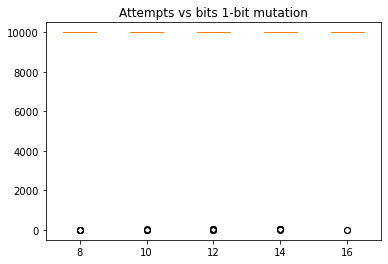

In [16]:
plot.boxplot((attempts),labels = bitsNumberList)
plot.title("Attempts vs bits 1-bit mutation")
plot.show()

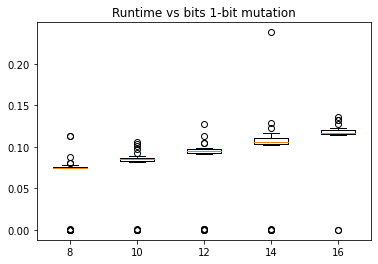

In [17]:
plot.boxplot((runtime),labels = bitsNumberList)
plot.title("Runtime vs bits 1-bit mutation")
plot.show()

Using the same finction than on previous task, we can see that it can't find the desired pattern in reasonable period of time.
That's because of our estimation function is non-linear with two global maxima and many local ones (see picture below). Using successive approximations fails to obtain the best result, since the process is frozen at the first encountered local maximum.

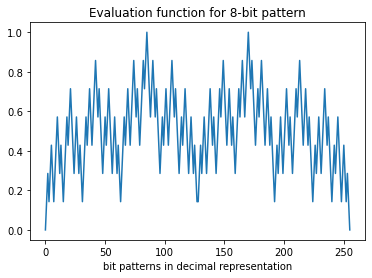

In [18]:
# code below is for build a graph of evaluation function
bitLength = 8
number = 2 ** bitLength
values = []
numbers = []
# convert a number to list of bits given length
getBin = lambda x, n: [int(i) for i in format(x, 'b').zfill(n)]
for i in range(number):
    values.append(evaluatePattern4(getBin(i, bitLength)))
    numbers.append(i)

plot.plot(numbers, values)
plot.title('Evaluation function for ' + str(bitLength) + '-bit pattern')
plot.xlabel("bit patterns in decimal representation")
plot.show() 

To avoid this, a wider range of mutations is applicable. At each stage of the approximation, we will change several (from 1 to half of all bits) in the pattern in order to "jump" out of the zones of the local maxima of the function.

In [19]:
# return list where [0] - attempts, [1] - time
def findBitPatternImproved4a(bitLength):
    counter = 0
    oldPattern = bitsRandom(bitLength)
    # just in case we guess at once
    if evaluatePattern4(oldPattern) > 0.999 : return [0, 0]
    startTime = time.time() 
    while True:
        # mutate from 1 to half of all bits in the pattern
        newPattern = mutateBits(oldPattern, randint(1, bitLength // 2))
        if (evaluatePattern4(newPattern) > evaluatePattern4(oldPattern)):
            oldPattern = list(newPattern)
        counter += 1
        #print(oldPattern)
        #print((evaluatePattern4(oldPattern)))
        if (evaluatePattern4(oldPattern) > 0.999 or counter > 100000):
            #print((evaluatePattern4(oldPattern)))
            break
    runTime = (time.time() - startTime)
    return [counter, runTime, oldPattern]

In [20]:
seed(1)
runs = 30
bitsNumberList = [8, 10, 12, 14, 16]

attempts = initResultList(len(bitsNumberList))
runtime = initResultList(len(bitsNumberList))

def task4a():
    for _ in range(runs):
        for index, bitsNumber in enumerate(bitsNumberList) :
            result = findBitPatternImproved4a(bitsNumber)
            attempts[index].append(result[0])
            runtime[index].append(result[1])

task4a()

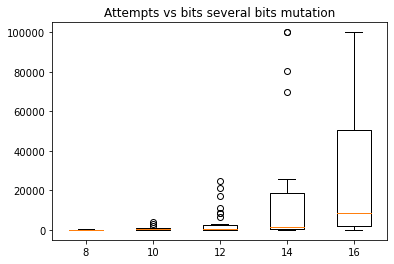

In [21]:
plot.boxplot((attempts),labels = bitsNumberList)
plot.title("Attempts vs bits several bits mutation")
plot.show()

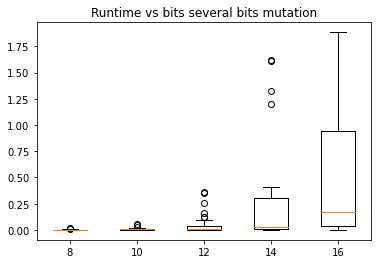

In [22]:
plot.boxplot((runtime),labels = bitsNumberList)
plot.title("Runtime vs bits several bits mutation")
plot.show()

Conclusions: in case of linear evaluation function, even we use small mutations, the process has fast convergence.
In case of non-linear evaluation function we can use bigger mutations to avoid stucks in suboptimal points. But this approach increase attempts and time. 

5. Generate a random set of patterns

In [23]:
# returns list of lists of random bit patterns
def getRandomPatterns(bitLength, amount = 100):
    result = []
    for i in range(amount):
        result.append(bitsRandom(bitLength))
    return result

 Select the best 30%

In [24]:
# return new list 
def selectTheBests(patternList, items = 30):
    if (items >= len(patternList)):
        print('Unsufficient items')
        return False
    # sort the list
    counter = 0 # fuse
    while True:
        stopFlag = True
        for index in range(len(patternList) - 1):
            if (evaluatePattern4(patternList[index]) < evaluatePattern4(patternList[index + 1])):
                patternList[index], patternList[index + 1] = patternList[index + 1], patternList[index]
                stopFlag = False
        counter += 1
        if (stopFlag or  counter > 1000):
            break
    return (list(patternList[:items]))

# test function
def testGetPatternsValue(patternList):
    result = []
    for pattern in patternList:
        result.append(evaluatePattern4(pattern))
    return result

Function, that generate (by mutation) a new set of 100 based on the best 30%,

In [25]:
# return the same list
def regeneratePatternList(patternList, items = 100):
    patternListLength = len(patternList)
    bitLength = len(patternList[0])
    index = 0
    while len(patternList) < items:
        # add to list mutated pattern from original list in cycle (from 0 to patternListLength)
        patternList.append(mutateBits(patternList[index % patternListLength], bitLength // 2))
    return patternList

To detect the stagnation we will use a stagnate index, it is an average value of evaluation of pattern list. In case this value stay almost the same after iteration, we suppose that improvement process has been stopped.

In [26]:
# return average evaluation for pattern list
def getStagnateIndex(patternList):
    result = 0
    for pattern in patternList:
        result += evaluatePattern4(pattern)
    return (result / len(patternList))

def isPatternFound(patternList):
    result = False
    for pattern in patternList:
        if evaluatePattern4(pattern) == 1.0 : 
            result = True 
    return result

In [27]:
# return list where [0] - attempts, [1] - time and several others values for test purpose
def findBitPatternMutator(bitLength):
    counter = 0
    patternList1 = getRandomPatterns(bitLength)
    startTime = time.time() 
    while True:
        indexBefore = getStagnateIndex(patternList1)
        patternList2 = selectTheBests(patternList1)
        patternList2 = regeneratePatternList(patternList2)
        indexAfter = getStagnateIndex(patternList2)
        counter += 1
        if (abs(indexBefore - indexAfter) < 0.00000000001 or isPatternFound(patternList2) or counter > 100000):
            break
        patternList1 = patternList2
    runTime = (time.time() - startTime)
    return [counter, runTime, indexAfter, testGetPatternsValue(selectTheBests(patternList2))]

In [28]:
seed(1)
runs = 30
bitsNumberList = [8, 10, 12, 14, 16]

# data model: [
#         6bit    [run1,run2,...,run30],
#         8bit    [run1,run2,...,run30],
#         .....      
#             ]

attempts = initResultList(len(bitsNumberList))
runtime = initResultList(len(bitsNumberList))

# 
def task5():
    for _ in range(runs):
        for index, bitsNumber in enumerate(bitsNumberList) :
            result = findBitPatternMutator(bitsNumber)
            attempts[index].append(result[0])
            runtime[index].append(result[1])

task5()

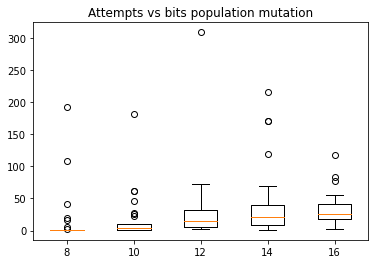

In [29]:
plot.boxplot((attempts),labels = bitsNumberList)
plot.title("Attempts vs bits population mutation")
plot.show()

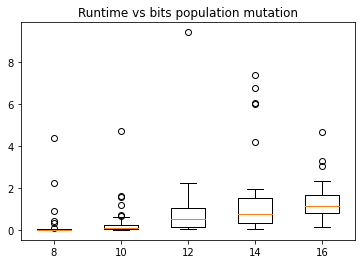

In [30]:
plot.boxplot((runtime),labels = bitsNumberList)
plot.title("Runtime vs bits population mutation")
plot.show()

The process of selecting the best patterns in a random population allows you to speed up the search process for large bit depth patterns. Also, the dependence of time on the bit depth does not increase exponentially, as is the case with successive mutations of the same pattern.

6. Let's create a method of generating a binary pattern that copies parts of two "parent" patterns - "crossover"

In [31]:
# return child pattern wich consist of 2 parent patterns parts
def crossoverPatterns(pattern1, pattern2):
    patternLength = len(pattern1)
    divideIndex = int(patternLength/2)
    childPattern =  pattern1[:divideIndex] + pattern2[divideIndex:]
    return childPattern

# regenerate pattern list by adding "children" patterns based on provided pattern list with "parents"
# return the same list
def regeneratePatternListCrossover(patternList, items = 100):
    patternListLength = len(patternList)
    bitLength = len(patternList[0])
    index = 0
    while len(patternList) < items:
        patternList.append(crossoverPatterns(patternList[index % patternListLength], patternList[(index + 1) % patternListLength]))
    return patternList

In [32]:
# return list where [0] - attempts, [1] - time
def findBitPatternCrossover(bitLength):
    counter = 0
    patternList1 = getRandomPatterns(bitLength)
    startTime = time.time() 
    while True:
        indexBefore = getStagnateIndex(patternList1)
        patternList2 = selectTheBests(patternList1)
        patternList2 = regeneratePatternListCrossover(patternList2)
        indexAfter = getStagnateIndex(patternList2)
        counter += 1
        if (abs(indexBefore - indexAfter) < 0.000000000001 or isPatternFound(patternList2) or counter > 100000):
            break
        patternList1 = patternList2
    runTime = (time.time() - startTime)
    return [counter, runTime, indexAfter, testGetPatternsValue(selectTheBests(patternList2))]

In [33]:
seed(1)
runs = 30
bitsNumberList = [8, 10, 12, 14, 16]

# data model: [
#         8bit    [run1,run2,...,run30],
#         10bit    [run1,run2,...,run30],
#         .....      
#             ]

attempts = initResultList(len(bitsNumberList))
runtime = initResultList(len(bitsNumberList))

# 
def task6():
    for _ in range(runs):
        for index, bitsNumber in enumerate(bitsNumberList) :
            result = findBitPatternCrossover(bitsNumber)
            attempts[index].append(result[0])
            runtime[index].append(result[1])

task6()

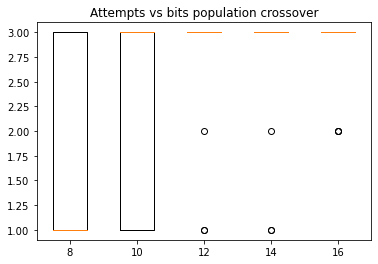

In [34]:
plot.boxplot((attempts),labels = bitsNumberList)
plot.title("Attempts vs bits population crossover")
plot.show()

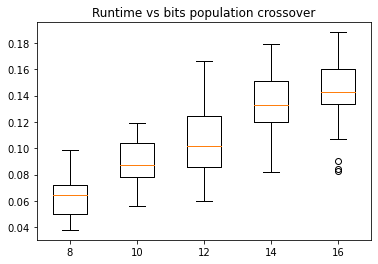

In [35]:
plot.boxplot((runtime),labels = bitsNumberList)
plot.title("Runtime vs bits population crossover")
plot.show()

In this case, the use of reproduction of a population by crossing shows the worst results then previos, since the diversity of offspring is determined by the original parental set, which, as a result of simple mixing, weakly increases the diversity. To improve the results, we will try to use a combined approach, adding mutated patterns to the population in addition to "children", implementing a rough model of the natural process of evolution.

In [36]:
# combinated approach - add both mutated bit patterns and crssoved "children" patterns
# return the same list
def regeneratePatternListCrossoverMutator(patternList, items = 100):
    patternListLength = len(patternList)
    bitLength = len(patternList[0])
    index = 0
    while len(patternList) < items:
        # add to list mutated pattern from original list in cycle (from 0 to patternListLength)
        patternList.append(mutateBits(patternList[index % patternListLength], bitLength // 2))
        patternList.append(crossoverPatterns(patternList[index % patternListLength], mutateBits(patternList[(index + 1) % patternListLength], bitLength // 2)))
    return patternList

# return list where [0] - attempts, [1] - time
def findBitPatternCrossoverMutator(bitLength):
    counter = 0
    patternList1 = getRandomPatterns(bitLength)
    startTime = time.time() 
    while True:
        indexBefore = getStagnateIndex(patternList1)
        patternList2 = selectTheBests(patternList1)
        patternList2 = regeneratePatternListCrossoverMutator(patternList2)
        indexAfter = getStagnateIndex(patternList2)
        counter += 1
        if (abs(indexBefore - indexAfter) < 0.000000000001 or isPatternFound(patternList2) or counter > 100000):
            break
        patternList1 = patternList2
    runTime = (time.time() - startTime)
    return [counter, runTime, indexAfter, testGetPatternsValue(selectTheBests(patternList2))]

In [37]:
seed(1)
runs = 30
bitsNumberList = [8, 10, 12, 14, 16]

attempts = initResultList(len(bitsNumberList))
runtime = initResultList(len(bitsNumberList))

def task6():
    for _ in range(runs):
        for index, bitsNumber in enumerate(bitsNumberList) :
            result = findBitPatternCrossoverMutator(bitsNumber)
            attempts[index].append(result[0])
            runtime[index].append(result[1])

task6()

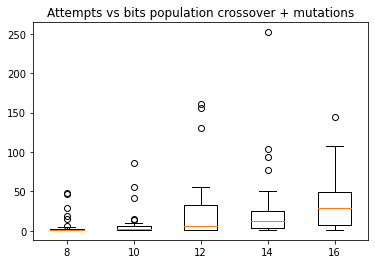

In [38]:
plot.boxplot((attempts),labels = bitsNumberList)
plot.title("Attempts vs bits population crossover + mutations")
plot.show()

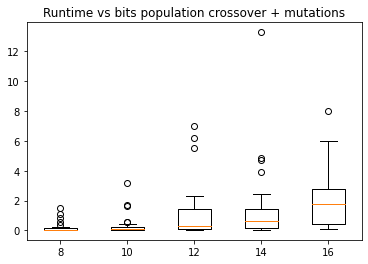

In [39]:
plot.boxplot((runtime),labels = bitsNumberList)
plot.title("Runtime vs bits population crossover + mutations")
plot.show()

Conclusion: the optimal search result is achieved through a combined approach, where crossing and mutations are used in the formation of a new population.